<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Developing-the-Parts" data-toc-modified-id="Developing-the-Parts-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Developing the Parts</a></span><ul class="toc-item"><li><span><a href="#Computing-p(D-|-cosi)" data-toc-modified-id="Computing-p(D-|-cosi)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Computing p(D | cosi)</a></span></li><li><span><a href="#p(cosi-|-K)" data-toc-modified-id="p(cosi-|-K)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>p(cosi | K)</a></span></li><li><span><a href="#Computing-p(D-|-K)" data-toc-modified-id="Computing-p(D-|-K)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Computing p(D | K)</a></span></li></ul></li><li><span><a href="#p(K-|-D)" data-toc-modified-id="p(K-|-D)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>p(K | D)</a></span></li><li><span><a href="#Plotting-&amp;-Testing" data-toc-modified-id="Plotting-&amp;-Testing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plotting &amp; Testing</a></span></li></ul></div>

In [1]:
import pandas as pd
#from Scripts.cosi_likelihood import Likelihood as p_D_cosi
import numpy as np
import matplotlib.pyplot as plt

In [2]:
main_dir = "/u/kaimibk/Documents/Research/NAC/"
data_dir = main_dir+"data/"
out_dir = main_dir+"output/"
fig_dir = out_dir+"figs/"

In [3]:
df = pd.read_csv(data_dir+"Pleiades_master.csv", index_col=0)
features = ["V_iso", "V_iso_err", "VSINI", "EVSINI", "distribution"]

In [4]:
df.head(2)

,Name,RA,Dec,K2MASS,(V-K)o,Period,Ref,BCK,logL/Lo,M/Mo,...,k2_vmag,k2_e_vmag,k2_teff,k2_e_teff,band,Index,iso_rad_K2,iso_rad_err_K2,iso_teff_K2,iso_teff_err_K2
0,J03394633+2358531,54.943067,23.981442,11.83,4.89,1.138,1.0,2.73,-1.66,0.41,...,NaN,NaN,3959.0,348.0,kmag,0,0.419426,0.013360,4222.314643,100.0
1,J03414664+2301198,55.444367,23.022186,13.16,5.63,0.294,1.0,2.81,-2.23,0.19,...,NaN,NaN,3514.0,144.0,kmag,1,0.268599,0.009612,3951.132391,100.0


## Developing the Parts

### Computing p(D | cosi)

In [5]:
cosi = np.arange(0.0, 1.002, 0.002)
cos_df = pd.DataFrame(columns=["{}".format(round(i,3)) for i in cosi])

In [6]:
for index, row in df.iterrows():
    if index % 10 == 0: print(index)
    
    v, v_sigma, vsini, vsini_sigma, dist = row[features].values
    
    L = p_D_cosi(cosi, v, v_sigma, vsini, vsini_sigma, distribution=dist)

    cos_df.loc[index] = L

cos_df["name"] = df.Name

0
10


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff 

20
30
40


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff 

50


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff 

60
70
80
90
100
110
120


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff 

130


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


140
150
160
170


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff 

180
190


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff 

200


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff 

210
220


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff 

230
240
250


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff 

260
270


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff 

280


In [8]:
cos_df.to_csv(main_dir+"Pleiades_cosi.csv")

### p(cosi | K)

In [4]:
import scipy.stats as st

In [5]:
cosi = np.arange(0.0, 1.002, 0.002)
kappa = [0.1, 1, 2, 5, 10, 20, 50, 100, 500, 1000]#np.logspace(-1, 3, 100)

In [164]:
class my_pdf(st.rv_continuous):
    def _pdf(self, k, cosi):
        temp = k / (2.*np.sinh(k)) * np.exp(k*cosi)
        #norm = np.trapz(k / (2.*np.sinh(k)) * np.exp(k*cosi), dx=0.005)
        return temp#/norm
    
fisher = my_pdf(name="fisher")

/u/kaimibk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in sinh
  This is separate from the ipykernel package so we can avoid doing imports until
/u/kaimibk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


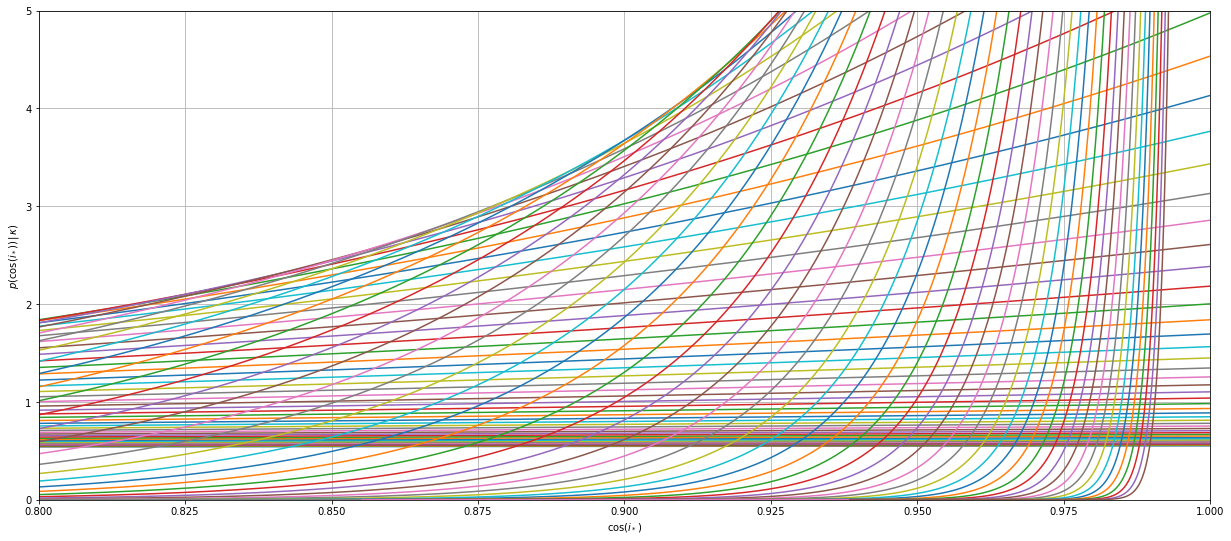

In [163]:
fig=plt.figure(figsize=(21,9))
#fig.patch.set_facecolor('#303030')
plt.grid()
ax = plt.gca()

for k in kappa:
    ax.plot(new_cosi, fisher.pdf(k, new_cosi))#, label="$\kappa = {}$".format(k))

ax.set_xlim(0.8,1.0)
ax.set_ylim(0,5)
ax.set_xlabel("$\cos(i_*)$")
ax.set_ylabel("$p(\cos(i_*)) \, | \, \kappa)$")
#plt.legend()

plt.savefig(fig_dir+"P_cosi_K.png", bbox_inches="tight", dpi=150, 
            facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()

### Computing p(D | K)

In [118]:
from scipy.interpolate import interp1d

In [90]:
cos_df = pd.read_csv(main_dir+"Pleiades_cosi.csv", index_col=0)

In [217]:
kappa = np.arange(0.1, 100, 1.0)
cosi = np.arange(0.0, 1.002, 0.002)
result = np.ones([len(cos_df), len(kappa)])

i = 0
## For each kappa
for k in kappa:
    p_Di_K = np.ones(len(cos_df))
    ## For each star
    for index, row in cos_df.iterrows():
        if pd.isna(row[0:-2]).any():
            p_Di_K[index] = 1.0
            continue
        
        p_D_cosi = row.values[0:-2]
        p_cosi_k = fisher.pdf(k, cosi)

        p_Di_K[index] = (np.nansum(np.nanprod([p_D_cosi, p_cosi_k], axis=0)))


    p_Di_K[np.where(np.logical_or(p_Di_K == 0, p_Di_K is np.nan))] = 1.0
    result[:,i] = np.log10(p_Di_K)
    i += 1

/u/kaimibk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  


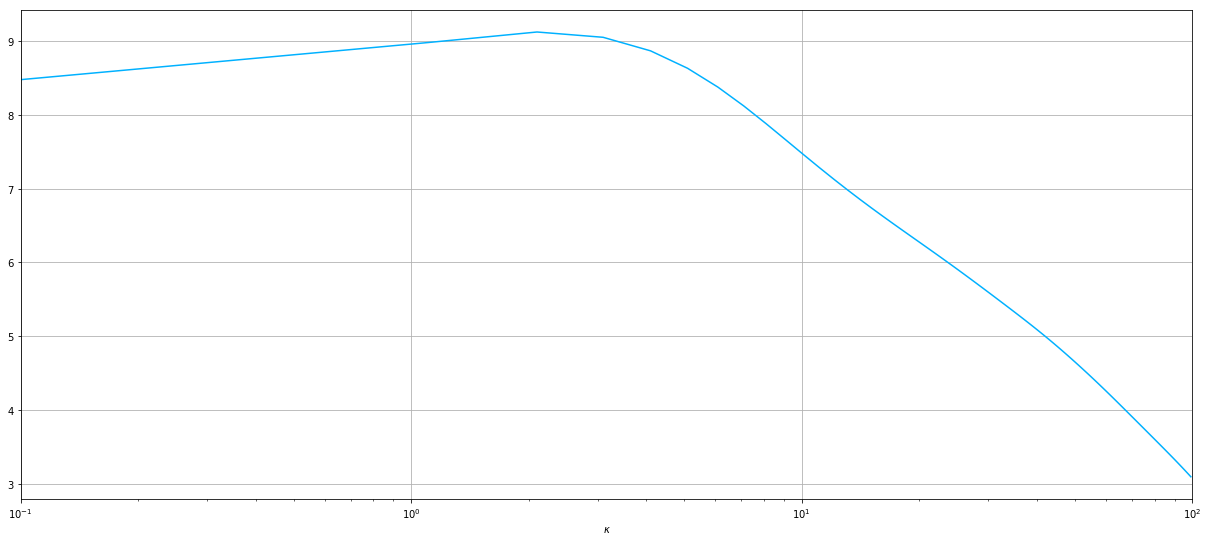

In [218]:
fig=plt.figure(figsize=(21,9))
#fig.patch.set_facecolor('#303030')
plt.grid()
ax = plt.gca()
colormap = plt.get_cmap('jet')
ax.set_color_cycle([colormap(k) for k in np.linspace(0.3, 1, len(kappa))])


p_D_K = np.sum(result, axis=0)
ax.plot(kappa, p_D_K /np.trapz(p_D_K, dx=0.002))
#ax.set_ylim(0,10)
ax.set_xlim(0.1, 100)
ax.set_xscale('log')

ax.set_xlabel('$\kappa$')
#plt.legend()
plt.savefig(fig_dir+"p_D_k.png", bbox_inches='tight', dpi=300)
#plt.show()

## p(K | D)

In [244]:
prior = np.asarray(list(map(lambda x: (1+x**2)**(-3.0/4.0), kappa)))
#norm_prior = prior/np.trapz(prior, dx=0.5)
p_K_D = prior * p_D_K

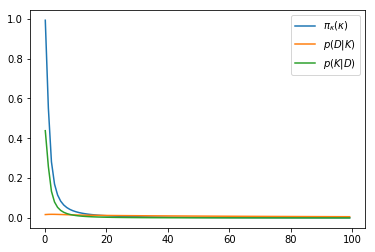

In [250]:
plt.plot(kappa, prior, label="$\pi_\kappa(\kappa)$")
plt.plot(kappa, p_D_K / np.trapz(p_D_K), label="$p(D|K)$")
plt.plot(kappa, p_K_D / np.trapz(p_K_D), label="$p(K|D)$")
plt.legend()
plt.savefig(fig_dir+"p_K_D.png", bbox_inches='tight', dpi=300)
#plt.xlim(0,5)

## Plotting & Testing

In [188]:
# import plotly.plotly as py
# import plotly.graph_objs as go
# from Scripts.plotly_save import save_fig

In [192]:
cosi = np.arange(0.0, 1.002, 0.002)
cos_df = pd.read_csv(main_dir+"Pleiades_cosi.csv", index_col=0)

In [29]:
order = df.sort_values(["iso_rad_K2"])

/u/kaimibk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  if __name__ == '__main__':


<Figure size 432x288 with 0 Axes>

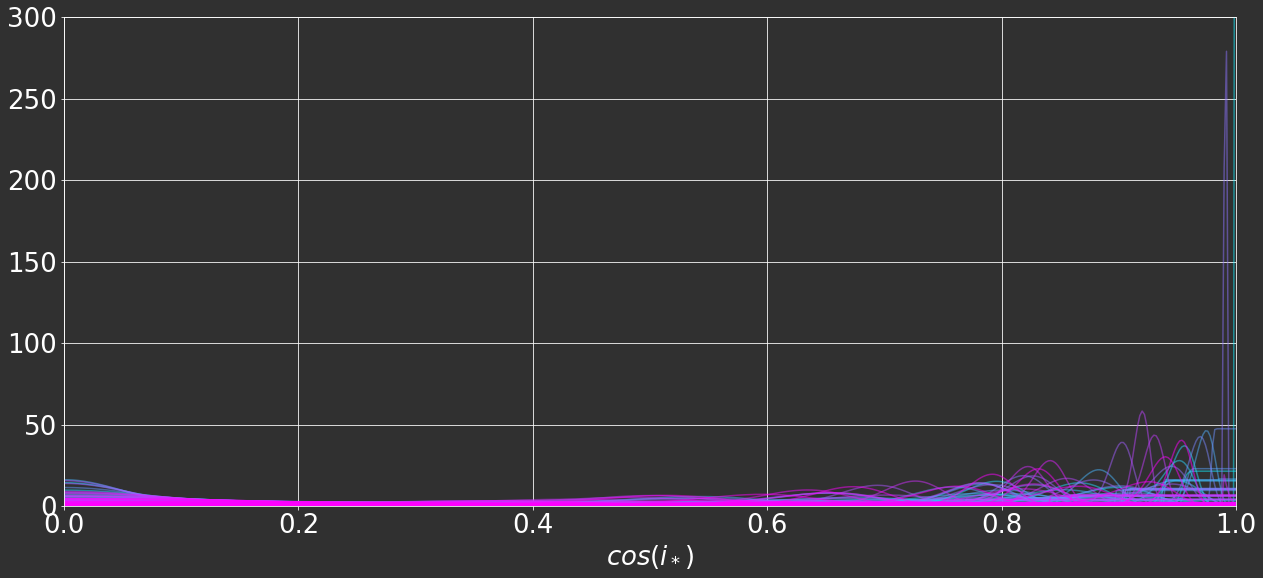

In [43]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.clf()
fig=plt.figure(figsize=(21,9))
fig.patch.set_facecolor('#303030')
plt.grid()
ax = plt.gca()
colormap = plt.get_cmap('cool')
ax.set_color_cycle([colormap(k) for k in range(len(cos_df))])

for index, row in order.iterrows():
    #ax.plot(cosi, row.values[~row.index.isin(["name"])])
    ax.plot(cosi, cos_df.iloc[index].values[0:-2], alpha=0.5)
    
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(26)

ax.set_facecolor("#303030")
ax.set_xlim(0,1)
ax.set_ylim(0,300)
ax.set_xlabel("$cos(i_*)$")
plt.savefig(fig_dir+"P_D_cosi.png", bbox_inches="tight", dpi=150, 
            facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

<Figure size 432x288 with 0 Axes>